In [32]:
import warnings
warnings.filterwarnings('ignore')

Importing libraries

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

Reading file data

In [34]:
file_path = './AgricultureData.csv'
df = pd.read_csv(file_path)

Getting first five records of the table

In [35]:
df.head()

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
0,b12c721e-8301-4b08-8ac3-d435be9b8b32,Lamb,Livestock,14.10,19224,14905,4319,Organic Meats Co.,"O'Reillyboro, OR",2022-07-04
1,4a0f8862-c851-4073-bc17-3a3d93834902,Beef,Livestock,11.37,29504,4550,24954,Organic Meats Co.,"Lake Nora, AR",2023-10-21
2,be996df6-1780-4352-8b7d-1f927279aa49,Oranges,Fruits,2.59,1838,1722,116,Berry Fields,"East Friedaside, NM",2023-12-24
3,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.34,6750,1232,5518,Fresh Dairy Farms,"East Javon, FL",2023-12-25
4,0bd5bf2b-be0a-4ba0-aa92-059021b169e3,Bananas,Fruits,1.78,48729,47020,1709,Golden Orchards,"Lake D'angelo, MN",2023-06-20


Removing null values from the table

In [36]:
df_cleaned = df.dropna()

Converting sale_date field into date and time column

In [37]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

filtering data of fruits and vegetables

In [38]:
filtered_data = df[df['category'].str.lower().isin(['vegetables', 'fruits'])]

# Display the filtered data
filtered_data.to_excel('fruits_and_vegetables.xlsx', index=False)
print("Data of fruits and vegetables has been saved to 'fruits_and_vegetables.xlsx'.")


Data of fruits and vegetables has been saved to 'fruits_and_vegetables.xlsx'.


for every sale date filter year , month, day_of_week, week , quarter

In [39]:
filtered_data['sale_date'] = pd.to_datetime(filtered_data['sale_date'])
filtered_data['year'] = filtered_data['sale_date'].dt.year
filtered_data['month'] = filtered_data['sale_date'].dt.month
filtered_data['day_of_week'] = filtered_data['sale_date'].dt.day_name()
filtered_data['week'] = filtered_data['sale_date'].dt.isocalendar().week
filtered_data['quarter']= filtered_data['sale_date'].dt.quarter
print(filtered_data[['sale_date', 'year', 'month', 'day_of_week', 'week', 'quarter']].head())

    sale_date  year  month day_of_week  week  quarter
2  2023-12-24  2023     12      Sunday    51        4
4  2023-06-20  2023      6     Tuesday    25        2
5  2023-01-22  2023      1      Sunday     3        1
6  2023-09-06  2023      9   Wednesday    36        3
12 2023-01-10  2023      1     Tuesday     2        1


total revenue and cost of every sale

In [40]:
filtered_data['total_revenue'] = filtered_data['price_per_kg'] * filtered_data['units_sold_kg']; 
filtered_data['total_cost'] = filtered_data['price_per_kg'] * filtered_data['units_shipped_kg'];

filtered_data['profit'] = filtered_data['total_revenue'] - filtered_data['total_cost'];
filtered_data['profit_margin'] = (filtered_data['profit'] / filtered_data ['total_revenue']);

print(filtered_data[['total_revenue', 'total_cost', 'profit', 'profit_margin']].head())

    total_revenue  total_cost    profit  profit_margin
2         4459.98     4760.42   -300.44      -0.067364
4        83695.60    86737.62  -3042.02      -0.036346
5        10558.84    20792.00 -10233.16      -0.969156
6         4478.88    12506.98  -8028.10      -1.792435
12       43952.48    68859.94 -24907.46      -0.566691


total revenue garnered every month

In [41]:
filtered_data = filtered_data.sort_values(by='sale_date')
monthly_sales = filtered_data.groupby(filtered_data['sale_date'].dt.to_period('M'))['total_revenue'].sum().reset_index()
monthly_sales['sales_growth_rate'] = monthly_sales['total_revenue'].pct_change() * 100

print(monthly_sales)

   sale_date  total_revenue  sales_growth_rate
0    2022-01     6159600.85                NaN
1    2022-02     4429271.46         -28.091583
2    2022-03     5359505.37          21.001962
3    2022-04     4532755.01         -15.425871
4    2022-05     3965081.34         -12.523811
5    2022-06     4199885.91           5.921810
6    2022-07     4931518.39          17.420294
7    2022-08     4837910.31          -1.898159
8    2022-09     4695785.24          -2.937737
9    2022-10     4492643.54          -4.326043
10   2022-11     4599214.52           2.372122
11   2022-12     4421213.97          -3.870238
12   2023-01     5224778.18          18.175194
13   2023-02     3446528.76         -34.034927
14   2023-03     4488590.22          30.235101
15   2023-04     3778544.93         -15.818893
16   2023-05     5438661.76          43.935347
17   2023-06     4510326.68         -17.069182
18   2023-07     5412340.06          19.998848
19   2023-08     5320307.72          -1.700417
20   2023-09 

Predicted Sales being made every month 

In [42]:
monthly_sales.set_index('sale_date', inplace=True)
model = ARIMA(monthly_sales['total_revenue'], order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)
print(forecast)

2024-01    5.677349e+06
2024-02    5.546421e+06
2024-03    5.377100e+06
Freq: M, Name: predicted_mean, dtype: float64


monthly sales of fruits and vegetables

month
1     52732.342174
2     41648.418394
3     44942.475000
4     41548.500000
5     45848.699630
6     42782.278562
7     48481.440491
8     52692.025800
9     50738.059718
10    44598.644459
11    46735.365094
12    50331.848431
Name: total_revenue, dtype: float64
month
1     34084.967156
2     28127.857929
3     32078.487264
4     29683.214071
5     30237.116077
6     29327.315118
7     32837.645873
8     32146.259589
9     35754.024651
10    31558.249125
11    32607.840065
12    32978.433645
Name: total_revenue, dtype: float64


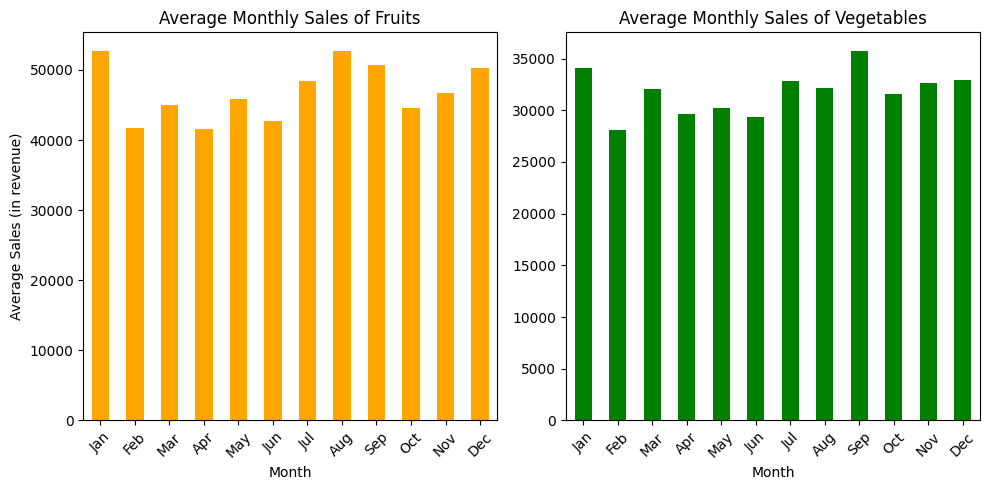

In [43]:
fruits_data = filtered_data[filtered_data['category'].str.lower() == 'fruits']
vegetables_data = filtered_data[filtered_data['category'].str.lower() == 'vegetables']

#monthly_trend = 
monthly_sales = filtered_data.groupby(filtered_data['sale_date'].dt.to_period('M'))['total_revenue'].sum().reset_index()
# fruits_monthly_trend = fruits_data.groupby(fruits_data['sale_date'].dt.to_period('M'))['total_revenue'].sum().reset_index()
# vegetables_monthly_trend = vegetables_data.groupby(vegetables_data['sale_date'].dt.to_period('M'))['total_revenue'].sum().reset_index()
fruits_monthly_trend = fruits_data.groupby('month')['total_revenue'].mean()
vegetables_monthly_trend = filtered_data.groupby('month')['total_revenue'].mean()
#print(monthly_trend)
# fruits_monthly_trend['sales_growth_rate'] =fruits_monthly_trend['total_revenue'].pct_change() * 100
# vegetables_monthly_trend['sales_growth_rate'] =vegetables_monthly_trend['total_revenue'].pct_change() * 100

print(fruits_monthly_trend)
print(vegetables_monthly_trend)

#monthly_trend.plot(kind='bar', title= 'Average Monthly Sales of Fruits and Vegetables', color='green')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
fruits_monthly_trend.plot(kind='bar', color='orange', title= 'Average Monthly Sales of Fruits')
plt.xlabel('Month')
plt.ylabel('Average Sales (in revenue)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.subplot(1,2,2)
vegetables_monthly_trend.plot(kind = 'bar', color='green', title='Average Monthly Sales of Vegetables')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

line graph

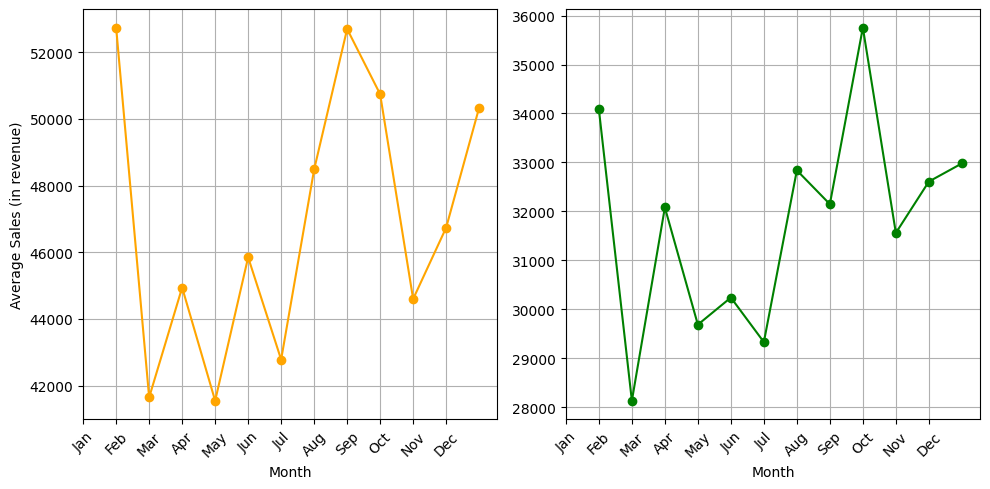

In [44]:
fruits_data = filtered_data[filtered_data['category'].str.lower() == 'fruits']
vegetables_data = filtered_data[filtered_data['category'].str.lower() == 'vegetables']

fruits_monthly_trend = fruits_data.groupby('month')['total_revenue'].mean()
vegetables_monthly_trend = filtered_data.groupby('month')['total_revenue'].mean()
#print(monthly_trend)

# monthly_trend.plot(kind='bar', title= 'Average Monthly Sales of Fruits and Vegetables', color='green')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(fruits_monthly_trend, marker='o', linestyle='-', color='orange', label='Fruits')
plt.xlabel('Month')
plt.ylabel('Average Sales (in revenue)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(vegetables_monthly_trend, marker='o', linestyle='-', color='green', label='Vegetables')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

statistics of data 

In [45]:
# Summary statistics
filtered_data.describe()

,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,sale_date,year,month,week,quarter,total_revenue,total_cost,profit,profit_margin
count,3611.000000,3611.000000,3611.00000,3611.000000,3611,3611.000000,3611.000000,3611.0,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000
mean,2.575552,25206.338410,12223.47383,12982.864580,2023-01-02 13:32:19.075048448,2022.510108,6.475492,26.358073,2.496815,31801.234780,64954.001703,-33152.766923,-6.230301
min,0.600000,1009.000000,9.00000,0.000000,2022-01-01 00:00:00,2022.000000,1.000000,1.0,1.000000,26.280000,735.360000,-358689.600000,-1061.555556
25%,1.070000,12777.500000,3500.50000,3894.000000,2022-07-01 12:00:00,2022.000000,3.000000,13.0,1.000000,6409.250000,21279.950000,-42751.210000,-3.218999
50%,2.310000,25116.000000,9273.00000,9674.000000,2023-01-08 00:00:00,2023.000000,6.000000,26.0,2.000000,17789.490000,43397.920000,-18824.400000,-1.084375
75%,3.530000,37648.500000,18124.50000,19856.500000,2023-07-06 00:00:00,2023.000000,10.000000,40.0,4.000000,41284.065000,93273.780000,-6938.125000,-0.350482
max,7.200000,49987.000000,48263.00000,49818.000000,2023-12-31 00:00:00,2023.000000,12.000000,52.0,4.000000,327879.090000,359906.400000,0.000000,0.000000
std,1.669967,14205.354248,10696.27642,11092.109349,NaN,0.499967,3.478091,15.179261,1.125222,39252.544602,60609.154407,39901.590412,35.212686


monthly sales of data

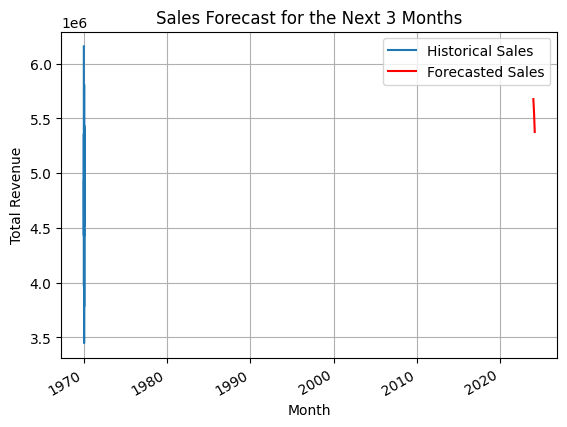

In [46]:
monthly_sales['total_revenue'].plot(label='Historical Sales', legend=True)
forecast.plot(label='Forecasted Sales', legend=True, color='red')

plt.title('Sales Forecast for the Next 3 Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

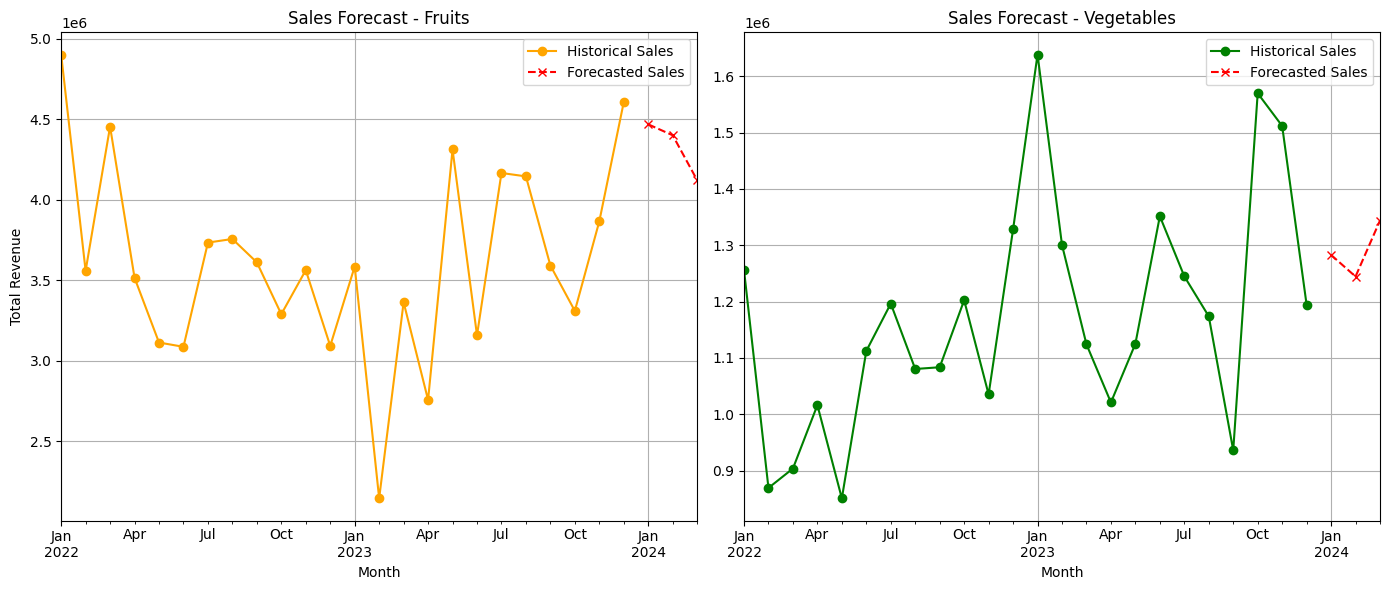

In [47]:
fruits_data = filtered_data[filtered_data['category'].str.lower() == 'fruits']
vegetables_data = filtered_data[filtered_data['category'].str.lower() == 'vegetables']

fruits_monthly_sales = fruits_data.groupby(fruits_data['sale_date'].dt.to_period('M'))['total_revenue'].sum()
vegetables_monthly_sales = vegetables_data.groupby(vegetables_data['sale_date'].dt.to_period('M'))['total_revenue'].sum()


fruits_model = ARIMA(fruits_monthly_sales, order=(5, 1, 0)).fit()
vegetables_model = ARIMA(vegetables_monthly_sales, order=(5, 1, 0)).fit()

fruits_forecast = fruits_model.forecast(steps=3)
vegetables_forecast = vegetables_model.forecast(steps=3)

# Step 4: Plot the historical and forecasted sales for fruits and vegetables

plt.figure(figsize=(14, 6))

# Plot for Fruits
plt.subplot(1, 2, 1)
fruits_monthly_sales.plot(label='Historical Sales', legend=True, marker='o', color='orange')
fruits_forecast.plot(label='Forecasted Sales', legend=True, marker='x', linestyle='--', color='red')
plt.title('Sales Forecast - Fruits')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Plot for Vegetables
plt.subplot(1, 2, 2)
vegetables_monthly_sales.plot(label='Historical Sales', legend=True, marker='o', color='green')
vegetables_forecast.plot(label='Forecasted Sales', legend=True, marker='x', linestyle='--', color='red')
plt.title('Sales Forecast - Vegetables')
plt.xlabel('Month')
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Sales statement

In [48]:
last_sales = monthly_sales['total_revenue'].iloc[-1]
if forecast.iloc[0] > last_sales:
    print("Sales are expected to increase in the next month.")
else:
    print("Sales are expected to decrease in the next month.")

Sales are expected to decrease in the next month.


In [49]:
last_sales = fruits_monthly_sales.iloc[-1]
if fruits_forecast.iloc[0] > last_sales:
    print("Fruit Sales are expected to increase in the next month.")
else:
    print("Fruit Sales are expected to decrease in the next month.")

last_sales2 = vegetables_monthly_sales.iloc[-1]
if vegetables_forecast.iloc[0] > last_sales:
    print("Vegetable Sales are expected to increase in the next month.")
else:
    print("Vegetable Sales are expected to decrease in the next month.")

Fruit Sales are expected to decrease in the next month.
Vegetable Sales are expected to decrease in the next month.


count of sales being made every month

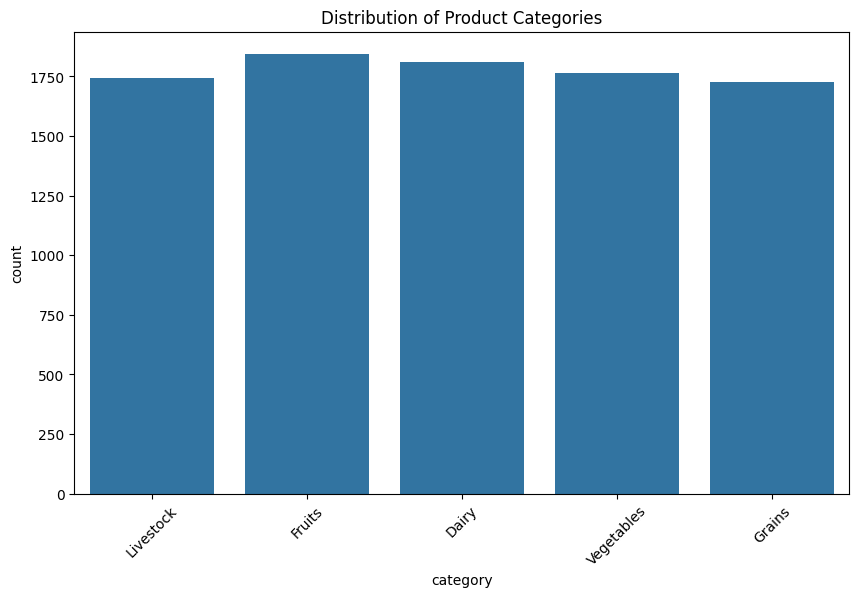

In [50]:
# Distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

Correlation heat map of variables

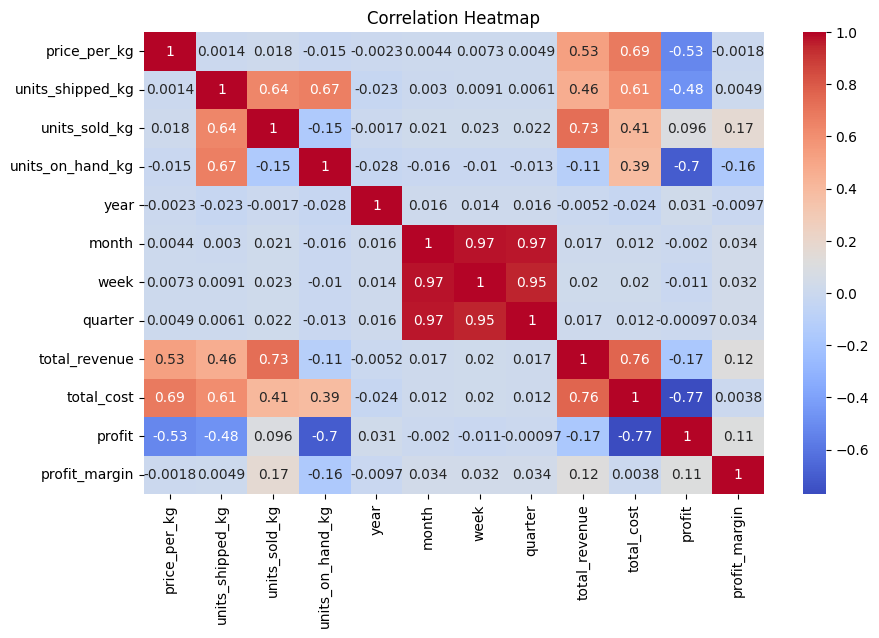

In [51]:
# Correlation heatmap
numeric_df = filtered_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

features and target variables

In [52]:
# Define features and target variable
X = numeric_df.drop(columns=['units_sold_kg'])
y = numeric_df['units_sold_kg']

training and testing sets

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

building a model

In [54]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

model prediction

In [55]:
# Make predictions
y_pred = model.predict(X_test)

In [56]:
y_pred

array([9.9850e+03, 1.7351e+04, 6.3780e+03, 2.6821e+04, 1.7777e+04,
       1.7471e+04, 4.7790e+03, 1.6050e+03, 1.5760e+04, 7.3420e+03,
       5.1400e+02, 6.2200e+02, 4.0208e+04, 9.3670e+03, 1.2495e+04,
       2.6500e+02, 1.0444e+04, 1.4323e+04, 8.6860e+03, 1.8713e+04,
       3.5250e+03, 2.3271e+04, 1.2376e+04, 9.9790e+03, 8.5860e+03,
       2.7083e+04, 4.6573e+04, 1.0889e+04, 5.0210e+03, 2.1168e+04,
       3.9100e+03, 1.3300e+03, 2.4024e+04, 1.4133e+04, 2.7548e+04,
       6.3320e+03, 2.1983e+04, 2.0359e+04, 1.2927e+04, 1.6540e+03,
       2.0979e+04, 4.5390e+03, 1.5034e+04, 3.3265e+04, 6.4870e+03,
       2.9330e+03, 1.0059e+04, 4.0790e+03, 2.8788e+04, 3.3816e+04,
       2.5673e+04, 1.9568e+04, 4.5305e+04, 3.0250e+03, 2.5635e+04,
       2.0384e+04, 1.4988e+04, 5.9100e+03, 2.3628e+04, 2.5656e+04,
       1.5640e+03, 1.0130e+03, 2.5880e+03, 3.2405e+04, 1.6415e+04,
       7.7760e+03, 3.2530e+03, 4.9600e+03, 2.1294e+04, 2.5210e+03,
       3.5800e+02, 1.1900e+04, 1.5745e+04, 4.1090e+04, 2.7375e

model evaluation

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

In [57]:
with open('classifier.pkl', 'wb') as file:
   pickle.dump(model, file)

In [58]:
prediction = model.predict([[2312,3789,5000,2421,4245,5986,7145,8096,9098,1012,2312]])

In [59]:
prediction

array([-1210.99999997])

In [60]:
df['sale_date'] = pd.to_datetime(df['sale_date'])  # Ensure 'sale_date' is a datetime object
df['month'] = df['sale_date'].dt.month  # Extract the month number from each date
# Assume numeric_df is your DataFrame with the necessary columns
X = numeric_df[['month', 'units_shipped_kg', 'price_per_kg']]
y = numeric_df['units_sold_kg']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Example prediction
new_data = [[5, 5000, 3.8]]  # month = 5, unitsAvailable = 1000, price = 2.5
predicted_units_sold = model.predict(new_data)
print("Predicted Units Sold:", predicted_units_sold)

Mean Squared Error: 69600837.26156788
R-squared Score: 0.39486623345391303
Predicted Units Sold: [2509.26005816]


In [61]:
y_pred

array([ 7411.20196545,  8611.29111216, 20371.1529035 , 17988.91404365,
       15516.99033805, 23320.43256866,  3457.2039083 ,  1697.81470814,
       19845.82184875,  6962.99801352, 23127.31636149,  1133.12610896,
       23879.77300115,  8465.09409745, 15202.09441235,  1421.48008425,
       17828.62590607,  9610.72895089,  9107.96198073, 19831.92935101,
        6404.24461754, 14026.20604968, 16607.1830677 , 14888.6047737 ,
       15434.66414938, 16599.92280168, 23056.39139109, 11857.10799725,
        4766.68807972, 18222.10292638,  7752.99199407,  5062.21275016,
       13094.7052972 , 14675.02724715, 21961.56754959,  3740.41630471,
       12893.35855413, 15158.03530528, 11104.764407  ,  5986.8901305 ,
       10624.58369154,  2137.90173129,  7321.22743313, 17767.43507215,
       12677.79170949,  4538.58112513, 20885.01592744,  3844.40915715,
       16860.63155676, 19970.57326025, 13722.01200359, 11752.91146277,
       23507.29063092, 21471.79853898, 12053.66662629, 14146.08073272,
      

In [63]:
with open('classifier.pkl', 'wb') as file:
   pickle.dump(model, file)